In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Cleaning and descriptive analysis

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


So we have to solve 2 problems:
1. 3 columns has missing values, so impute those missing values
2. In 1 record we can see age is 22 but person_emp_length is 123 so that's not possible, so will have to solve that one too

In [84]:
''' Let's create a function which considers 16 as minimum age to work and in the records like 1 one we can assign person_emp_lenth that numbe of years'''
from sklearn.impute import SimpleImputer
for index, row in df.iterrows():
    age_classifier = row['person_age'] - row['person_emp_length']
    if age_classifier < 16 or pd.isna(row['person_emp_length']):
        df.loc[index, 'person_emp_length'] = row['person_age'] - 16 # In df.iterrows function, row contains copy of our df data so changing in row cannot change our dataframe 

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [86]:
df.loc[df['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


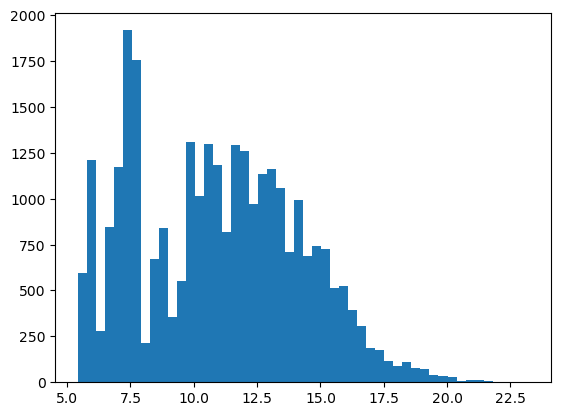

In [87]:
plt.hist(df['loan_int_rate'], bins=50)
plt.show()

C:\Users\invok\AppData\Local\Temp\ipykernel_9664\4282466864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set2')


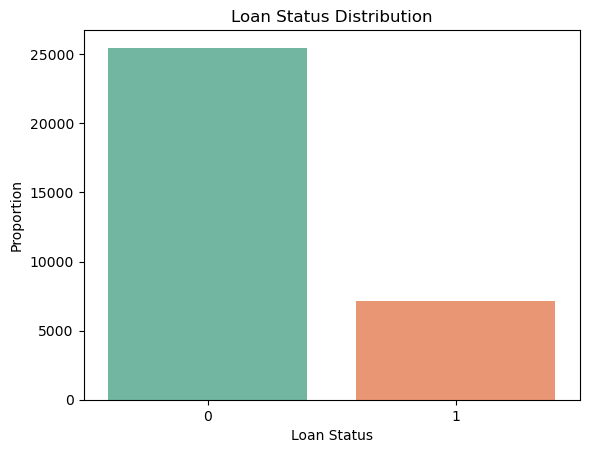

In [88]:
# Visualize the distribution
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Proportion")
plt.show()


# Feature Engineering

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


preprocessor = ColumnTransformer(
    transformers=[
        ('encoded_data', OneHotEncoder(drop='first', sparse_output=False), [2, 4, 5, 10]),
        ('scaled_data', StandardScaler(), [0,1,3,6,7,9,11])
    ],
    remainder='drop'
)


In [91]:
processed_data = preprocessor.fit_transform(df)
processed_data.shape

(32581, 22)

In [92]:
cat_feature_names = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
encoded_column_names = preprocessor.named_transformers_['encoded_data'].get_feature_names_out(cat_feature_names)

num_columns = df.columns[[0, 1, 3, 6, 7, 9, 11]]
scaled_column_names = num_columns

final_column_names = np.concatenate([np.array(encoded_column_names), np.array(scaled_column_names)])

df_1 = pd.DataFrame(processed_data)
df_1.columns = final_column_names
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_home_ownership_OTHER  32581 non-null  float64
 1   person_home_ownership_OWN    32581 non-null  float64
 2   person_home_ownership_RENT   32581 non-null  float64
 3   loan_intent_EDUCATION        32581 non-null  float64
 4   loan_intent_HOMEIMPROVEMENT  32581 non-null  float64
 5   loan_intent_MEDICAL          32581 non-null  float64
 6   loan_intent_PERSONAL         32581 non-null  float64
 7   loan_intent_VENTURE          32581 non-null  float64
 8   loan_grade_B                 32581 non-null  float64
 9   loan_grade_C                 32581 non-null  float64
 10  loan_grade_D                 32581 non-null  float64
 11  loan_grade_E                 32581 non-null  float64
 12  loan_grade_F                 32581 non-null  float64
 13  loan_grade_G    

In [93]:
# target_col = df['loan_status']
# df_1 = pd.concat([df_1, target_col], axis=1, ignore_index=True)
# df_1.head(5)
df_1['loan_status'] = df['loan_status']

In [94]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_home_ownership_OTHER  32581 non-null  float64
 1   person_home_ownership_OWN    32581 non-null  float64
 2   person_home_ownership_RENT   32581 non-null  float64
 3   loan_intent_EDUCATION        32581 non-null  float64
 4   loan_intent_HOMEIMPROVEMENT  32581 non-null  float64
 5   loan_intent_MEDICAL          32581 non-null  float64
 6   loan_intent_PERSONAL         32581 non-null  float64
 7   loan_intent_VENTURE          32581 non-null  float64
 8   loan_grade_B                 32581 non-null  float64
 9   loan_grade_C                 32581 non-null  float64
 10  loan_grade_D                 32581 non-null  float64
 11  loan_grade_E                 32581 non-null  float64
 12  loan_grade_F                 32581 non-null  float64
 13  loan_grade_G    

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
train_data = df_1[df_1[df_1.columns[19]].notna()]
predict_data = df_1[df_1[df_1.columns[19]].isna()]  

In [97]:
X_train = train_data.drop(train_data.columns[19], axis=1)
y_train = train_data[train_data.columns[19]]

In [98]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [99]:
model = LinearRegression()
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_test_split)

# Evaluate performance
mse = mean_squared_error(y_test_split, y_pred)
r2 = r2_score(y_test_split, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.09487639649143956
R-squared Score: 0.9076913940281383


In [100]:
x_redict = predict_data.drop(predict_data.columns[19], axis=1)

predictions = model.predict(x_redict)

In [101]:
df_1.loc[df_1[df_1.columns[19]].isna(), df_1.columns[19]] = predictions

In [102]:
df_1

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-0.903374,-0.114143,0.252277,4.019404,1.545580,3.931411,-0.691554,1
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-1.060904,-0.911147,0.014673,-1.358650,0.039595,-0.657458,-0.938167,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.430783,-0.911147,-0.935743,-0.646849,0.573479,3.744110,-0.691554,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.745843,-0.009274,-0.222931,4.019404,1.301784,3.369508,-0.938167,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.588313,-0.188358,0.727485,4.019404,1.005524,3.556809,-0.444942,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,4.610190,-0.210945,-0.935743,-0.599395,0.662974,-0.563808,5.966992,0
32577,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.137599,0.870011,-0.222931,1.271060,-1.086807,-0.189207,3.254251,0
32578,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5.870433,0.160129,-0.460535,4.019404,-0.006695,2.713956,5.473767,1
32579,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.452660,1.354021,0.014673,0.855843,0.144521,-0.657458,4.980541,0


# Model

In [104]:
features = df_1.drop(df_1.columns[-1], axis=1)
target = df_1[df_1.columns[-1]]

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit_transform(features, target)

# Get selected feature names
selected_features = features.columns[selector.get_support()]
print("Selected Features:", selected_features)

final_features = features[selected_features]

Selected Features: Index(['person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'cb_person_default_on_file_Y', 'person_income', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income'],
      dtype='object')


In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [107]:
x_train,x_test,y_train,y_test = train_test_split(final_features, target , test_size=0.2, random_state=42, stratify=target)

In [150]:
# Logistic Regression
logreg_param = {
    'C' : [100, 10, 1, 0.1, 0.01]
}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_param, cv=5, scoring='f1')
logreg_grid.fit(x_train, y_train)
logreg_best = logreg_grid.best_estimator_
print(logreg_best.get_params())

{'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [148]:
# Decision Tree
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='f1', n_jobs=-1)
tree_grid.fit(x_train, y_train)
tree_best = tree_grid.best_estimator_
print(tree_best.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


For support vector machine, I am taking a sample of data because when I implement the support vector classifier on x_train, it's taking so much time and the reason behind it is that the data is pretty large and support vector machine is also time-consuming algorithm

In [146]:
# Support Vector Machine
x_sampled, _, y_sampled, _ = train_test_split(final_features, target , train_size=10000, random_state=42, stratify=target)

x_svc_train, x_svc_test, y_svc_train, y_svc_test =  train_test_split(x_sampled, y_sampled , test_size=0.2, random_state=42, stratify=y_sampled)

svc_params= {
    'C': [100, 10, 1, 0.1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2,3,4],
    'gamma': ['scale', 'auto']
}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5, scoring='f1', n_jobs=-1)
svc_grid.fit(x_svc_train, y_svc_train)
svc_best = svc_grid.best_estimator_
print(svc_best.get_params())

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
